In [1]:
import os
os.chdir(os.path.expanduser('~/FFF/'))
import fff
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import pickle as pkl
import umap
matplotlib.rcParams.update({'font.size': 18})

INFO: Using pytorch backend
/tmp/ipykernel_3648142/583152811.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
classifier = False

In [3]:
df_class = pd.read_pickle("data/EMnist_Class")

if classifier:
    df = df_class
else:
    df = pd.read_pickle("data/16EMnist_F3F")
# read targets and conditions from dataframe
train_data, train_targets = (
    torch.from_numpy(df["train_x"]),
    torch.from_numpy(df["train_y"]),
)

center = torch.mean(train_targets)
std = torch.std(train_targets)

train_l, test_l = (
    torch.from_numpy(df_class["train_l"]),
    torch.from_numpy(df_class["test_l"]),
)
train_l = torch.argmax(train_l, dim=1)
test_l = torch.argmax(test_l, dim=1)

In [4]:
if classifier:
    GTa = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "GTs/16EMnist_Class/checkpoints/last.ckpt"
    ).eval()
    GT = fff.utils.truncate.Truncate(GTa)
else:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
    #"GTs/16Mnist_F3F/checkpoints/best.ckpt"
    "GTs/16EMnist_F3F/checkpoints/last.ckpt"
    #"GTs/16Mnist_F16F/checkpoints/last.ckpt"
    #"lightning_logs/28x28/version_3/checkpoints/last.ckpt"
    ).eval()
    GTa = GT

torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3


In [5]:
model_src = "logs_f3f/3_diff"
model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
    f"{model_src}/checkpoints/last.ckpt"
)

torch.Size([5000, 256])
torch.Size([1000])


/export/home/wjoran/FFF/fff/utils/diffusion.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(betas, dtype=torch.float32)


cond_dim:  0
latent_dim:  64
load models checkpoint
Only the transform_model will be trained while the model is kept fixed!
Also the noise is added only to the latent variables!
fff.model 64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3


In [6]:
torch.set_grad_enabled(False)

tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
reconstructing...
sampling...
torch.Size([40000, 0])
3
median tensor(0.0796)
plotting


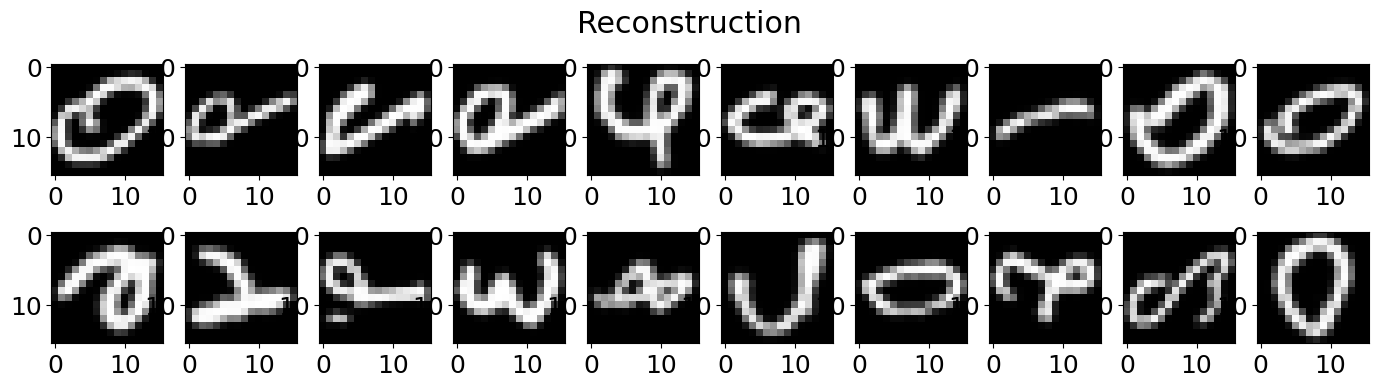

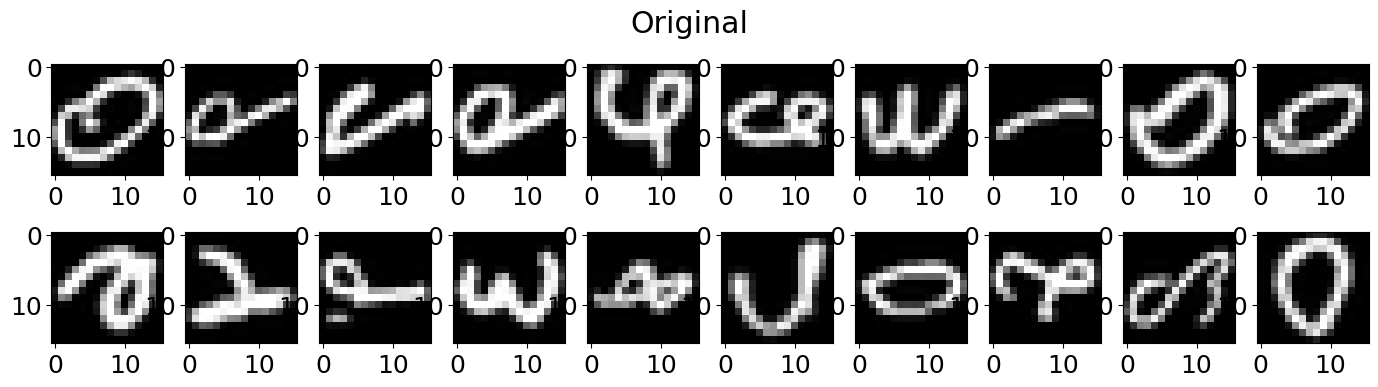

In [21]:
save = False
plot_dir = "emnist/exp/f3f_4/010"
from pathlib import Path
import shutil
if save:
    Path(f"plots/{plot_dir}/runfile").mkdir(parents=True, exist_ok=True)
    shutil.copytree(model_src, f"plots/{plot_dir}/runfile", symlinks=False, ignore=None,ignore_dangling_symlinks=False, dirs_exist_ok=True)
data = plot_mnist(model)
if model.transform == "diffusion":
    z_dim = 64
    std_z0 = 1
else:
    z_test = data["test_z_dense"]
    z_dim = z_test.shape[1]
    std_z0 = 1
latent_dim = max(1, data["test_c"].shape[1])

tensor(0.2456)


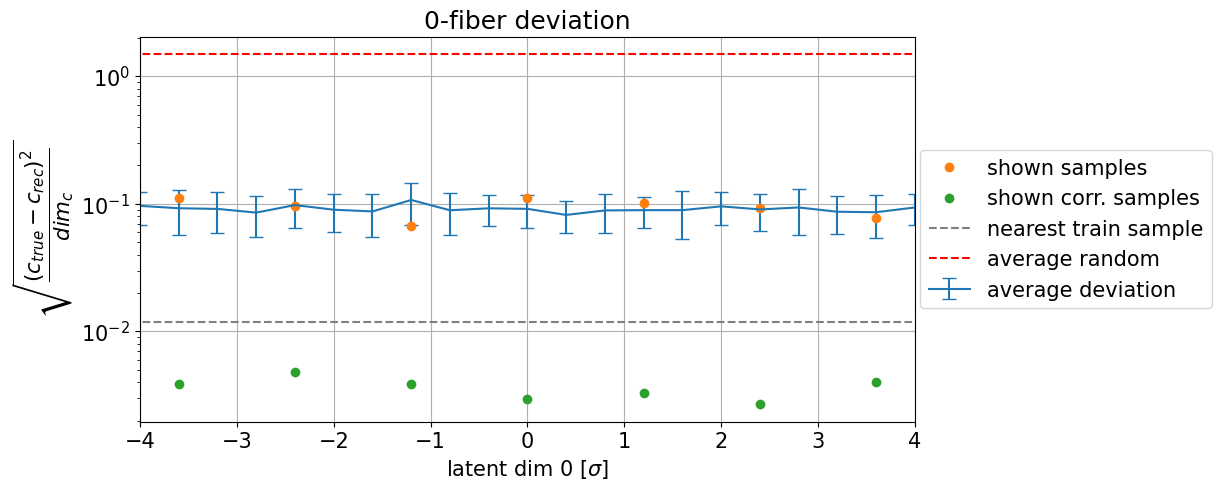

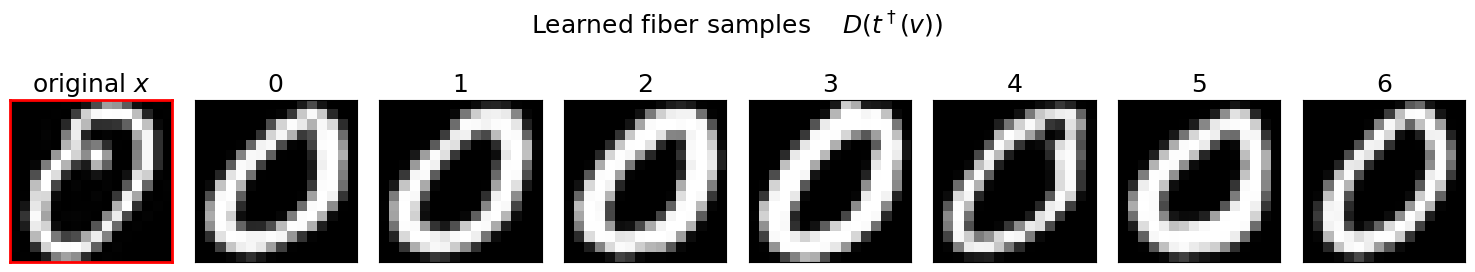

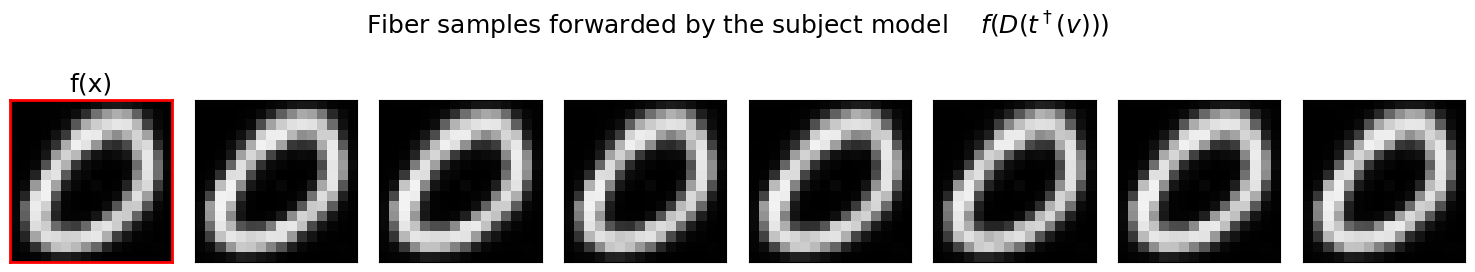

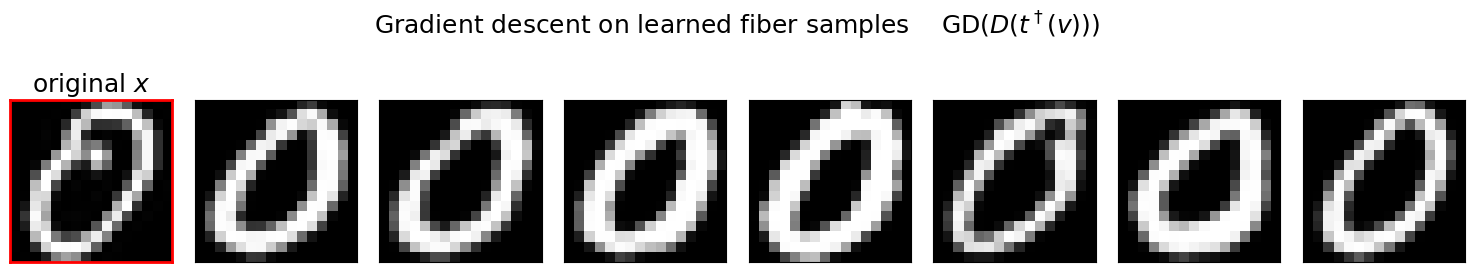

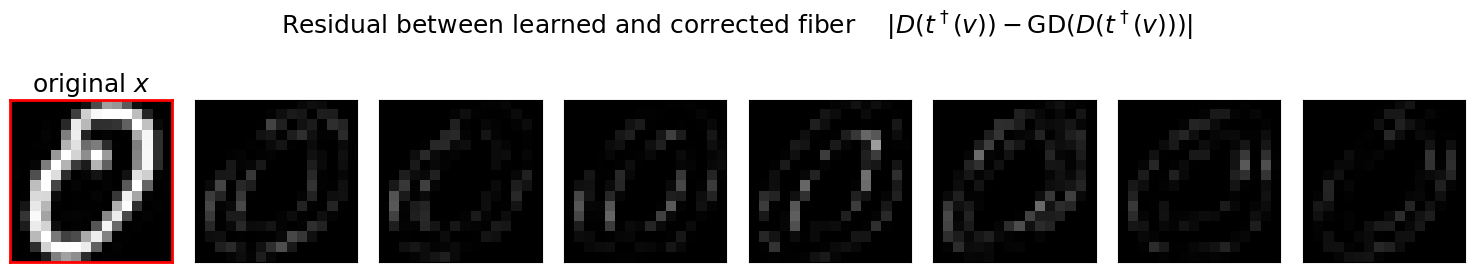

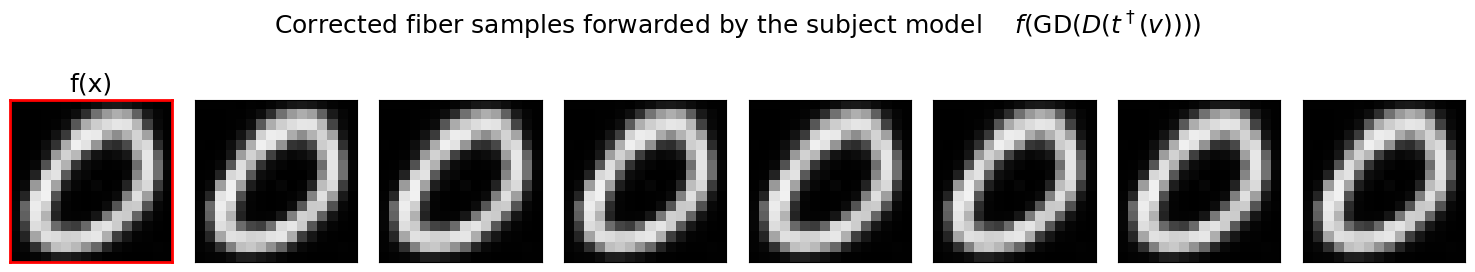

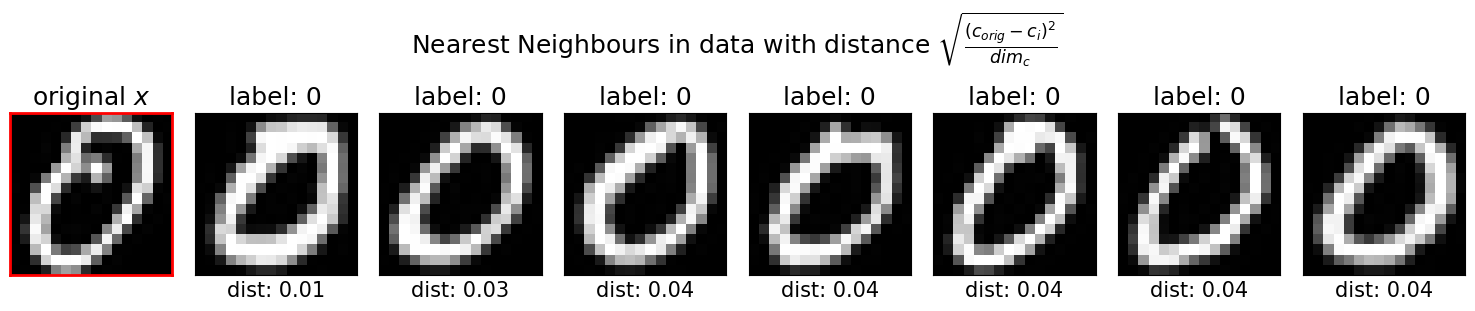

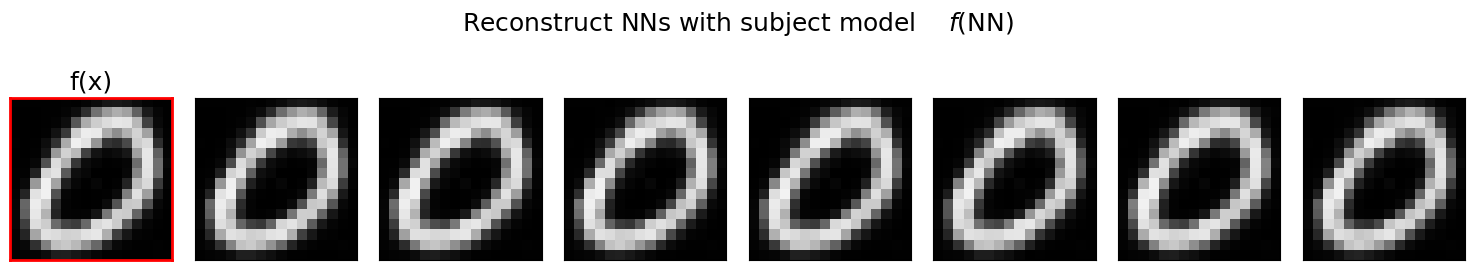

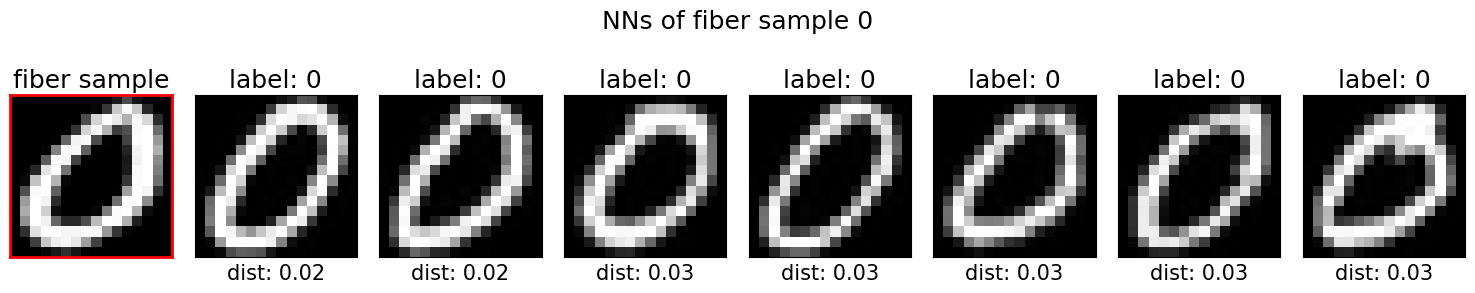

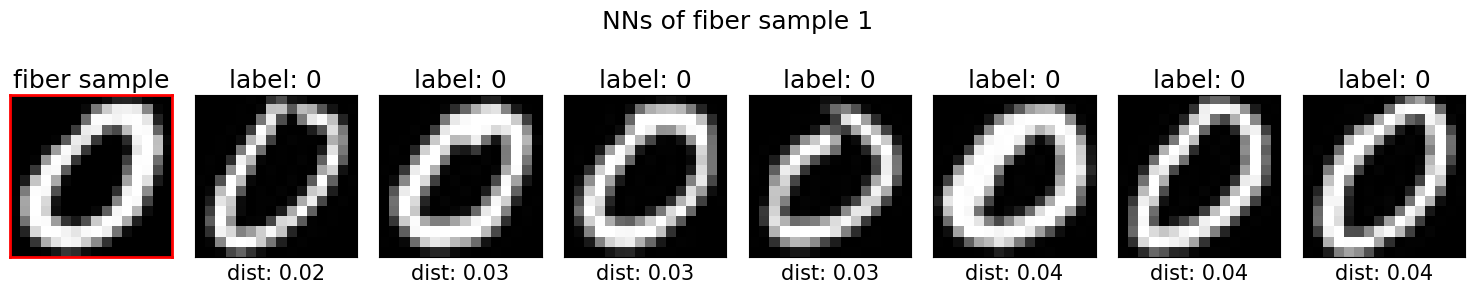

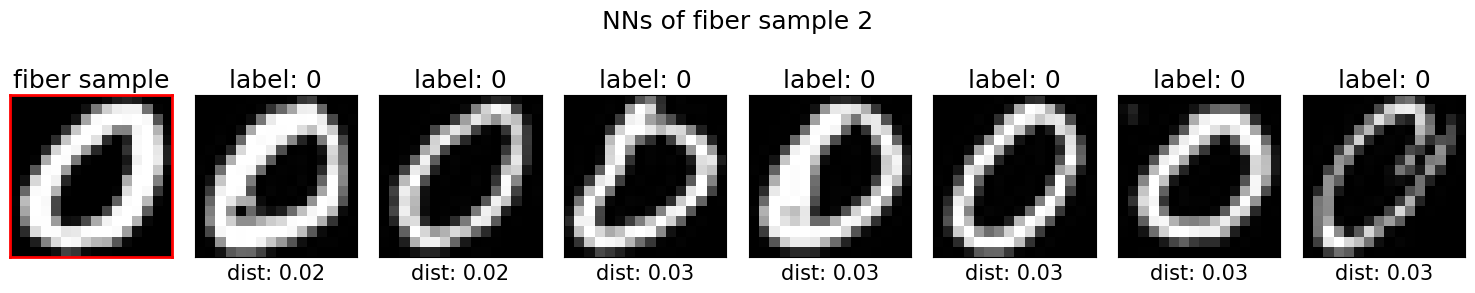

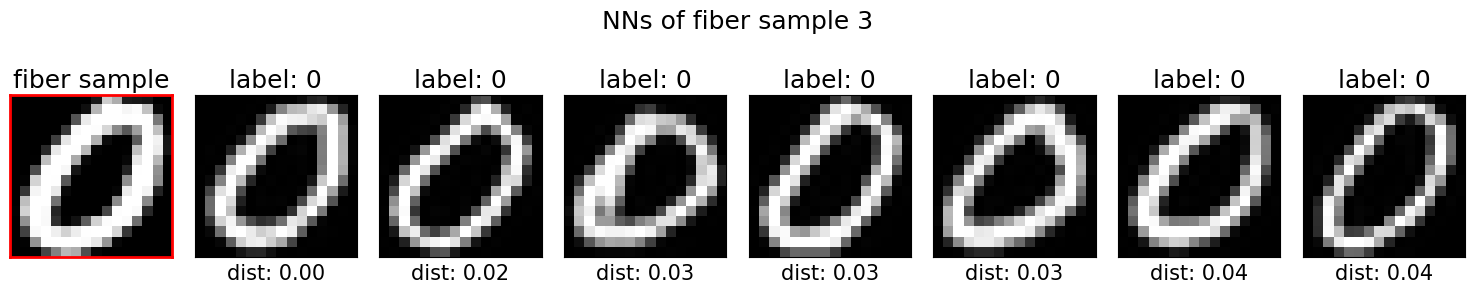

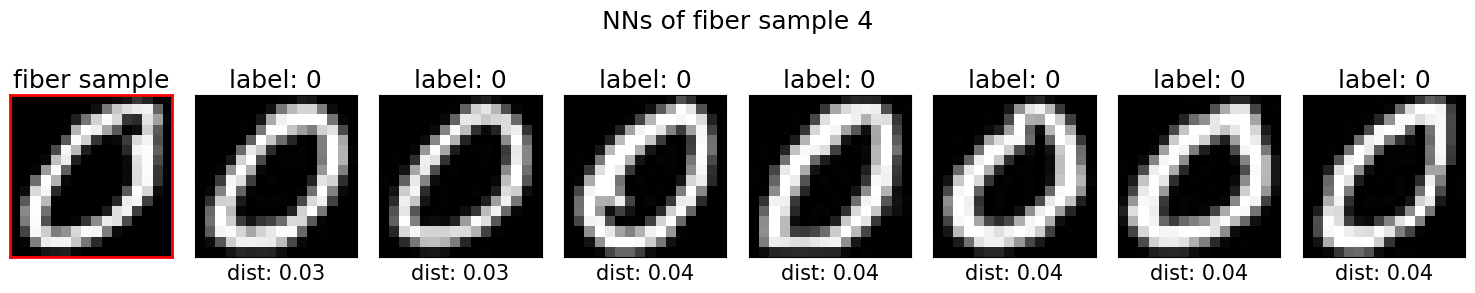

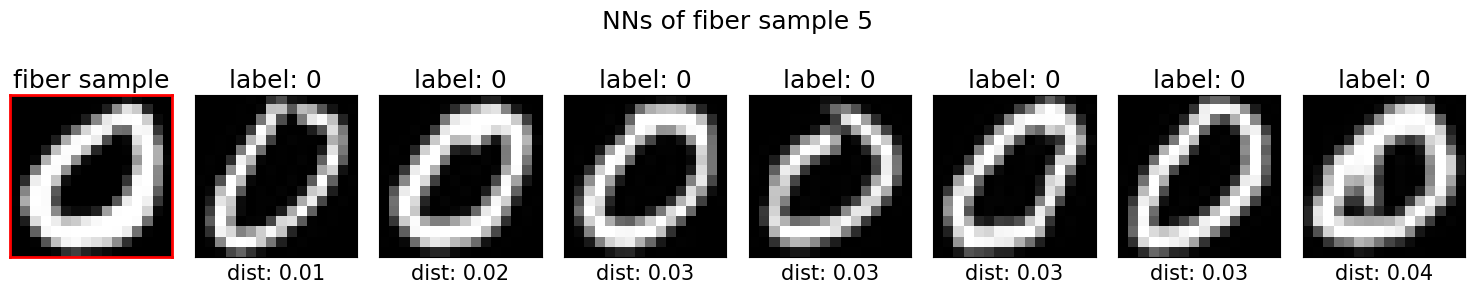

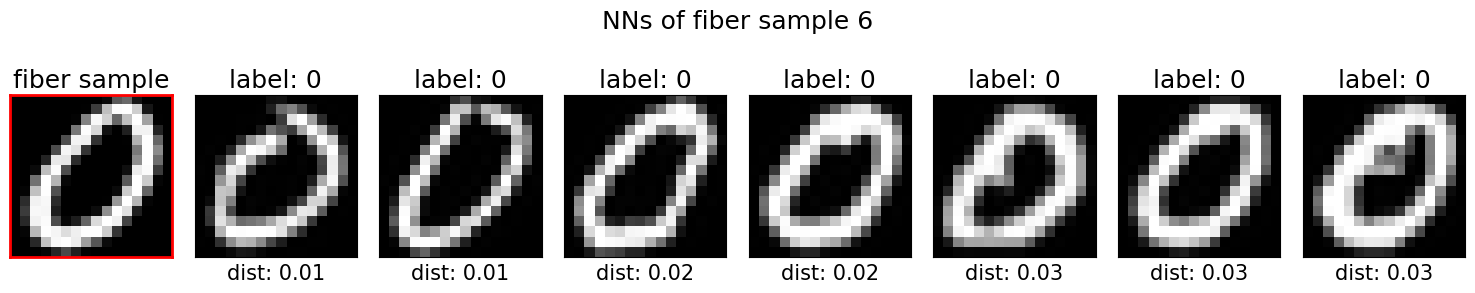

In [22]:
zrange = 4 *std_z0
matplotlib.rcParams.update({'font.size': 15})
nums = [0,9,7,9,2,2,3,1,0,0,6,4,9,3,8,2,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5]
ran = [35,0,12,2,5,6,7,10,11,14]
ran = [0]

for j in ran:
    plot_details(model, data, j, zrange, GD_steps=20, sanity=False)

In [5]:
save = False
from pathlib import Path
import shutil
zrange = 4
matplotlib.rcParams.update({'font.size': 15})
nums = [0,9,7,9,2,2,3,1,0,0,6,4,9,3,8,2,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5]
ran = [35,0,12,2,5,6,7,10,11,14]

In [11]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.9.2


In [21]:
cl = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/01","dnf/011","dnf/012","diff/b4","nf/short","nf/short_01","nf/short_02","ssf/01_short","ssf/011_short"]
five = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/lin_short","dnf/lin_short_01","diff/b4","nf/lin_short","nf/lin_short_01","nf/lin_short_02","ssf/lin","ssf/lin_02"]
names = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/lin_short","dnf/lin_short_01","dnf/lin_short_02","diff/big","nf/lin_short","nf/lin_short_01","nf/lin_short_02","ssf/lin_02","ssf/lin_021", "nf/rq", "nf/rq_01","nf/rq_02"]
bpvs = []
for model_name in names:
    print(model_name)
    model_src = f"plots/emnist/F3F/{model_name}/runfile"
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        f"{model_src}/checkpoints/last.ckpt"
    )
    plot_dir = f"emnist/F3F/{model_name}"
    #Path(f"plots/{plot_dir}/runfile").mkdir(parents=True, exist_ok=True)
    #shutil.copytree(model_src, f"plots/{plot_dir}/runfile", symlinks=False, ignore=None,ignore_dangling_symlinks=False, dirs_exist_ok=True)
    bpv = plot_mnist(model)
    bpvs.append(bpv)
    """
    std_z0 = 1
    if model.transform == "diffusion":
        z_dim = 64
    else:
        z_test = data["test_z_dense"]
        z_dim = z_test.shape[1]
    latent_dim = max(1, data["test_c"].shape[1])
    for j in ran:
        plot_details(model, data, j, zrange, GD_steps=20, sanity=False)
    """

fff/01
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
cond_dim:  3
latent_dim:  64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampling...
torch.Size([40000, 0])
3
fff/011
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
cond_dim:  3
latent_dim:  64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampling...
torch.Size([40000, 0])
3
fff/012
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
cond_dim:  3
latent_dim:  64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampli

/export/home/wjoran/FFF/fff/utils/diffusion.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(betas, dtype=torch.float32)


torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampling...
torch.Size([40000, 0])
3
nf/lin_short
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampling...
torch.Size([40000, 0])
3
nf/lin_short_01
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
64
Teacher is Autoencoder
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  3
tensor([[-0.5736,  1.7434,  0.7783],
        [ 0.6681, -0.6047, -0.0502]])
encoding...
torch.Size([40000, 64])
sampling...
torch.Size([40000, 0])
3
nf/lin_short_02
torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
64
Teacher is Autoencoder
torch.Size([240000, 1, 16

In [7]:
def plot_details(model2plot, data, i_sample, zrange, GD_steps=100, sanity=False):
    device = model2plot.device
    
    pos_min, pos_max = -zrange, zrange
    c = data["test_c"]
    #z = data["test_z_dense"]
    train_c = data["train_c"]
    train_samples = data["train_samples"]
    test_samples = data["test_samples"]
    N = 21
    n = 7
    ddim = z_dim
    x_orig = test_samples[i_sample]

    # calculate x_c_x
    if classifier:
        conditioned = GTa.apply_conditions((train_samples,torch.zeros((train_samples.shape[0],0),device=test_samples.device)))
    else:
        conditioned = GT.apply_conditions((train_samples,))
    c_GT = conditioned.condition
    x_GT = conditioned.x0
    y_GT = torch.cat([
        GT.encode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(x_GT.split(512), c_GT.split(512))
    ])
    train_c_GT = (y_GT  - center) / std
    # calculate x_c_x
    if classifier:
        conditioned = GTa.apply_conditions((test_samples,torch.zeros((test_samples.shape[0],0),device=test_samples.device)))
    else:
        conditioned = GT.apply_conditions((test_samples,))
    c_GT = conditioned.condition
    x_GT = conditioned.x0
    y_GT = torch.cat([
        GT.encode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(x_GT.split(512), c_GT.split(512))
    ])
    x_test_GT = GTa.decode(y_GT.to(device), c_GT.to(GTa.device)).detach().cpu()
    xcx = x_test_GT[i_sample]
    c_GT = (y_GT  - center) / std

    # calculate Nearest Neighbours
    verify = c_GT[i_sample]
    NN, similar, NN_suptitle, NN_titles = calc_NNs(verify, train_c_GT, train_samples, n+1)
    
    #calculate walk along 0th detail dimension with sampled rest
    z0_range = torch.linspace(pos_min, pos_max, N)
    #z0_sample = z[i_sample][0].numpy()

    #new_details_norm = torch.randn(40,N,ddim-1)
    new_details_norm = model2plot.get_latent("cpu").Dist.sample([40,N])[:,:,:-1]
    z0_range_norm = torch.unsqueeze(z0_range,0)
    z0_range_norm = z0_range_norm.repeat(40,1)
    new_details_norm = torch.cat([torch.unsqueeze(z0_range_norm,2), new_details_norm], dim=2)
    new_details_norm = torch.reshape(new_details_norm, (40*N,ddim))
    vz_dense = new_details_norm
    #print(torch.reshape(new_details_norm, (40,N,100))[0,:,0])
    
    #decoding...
    c_sample_GT = torch.unsqueeze(c_GT[i_sample], dim=0)
    c_sample = torch.unsqueeze(c[i_sample], dim=0)
    c_sample_norm = c_sample.repeat(40*N,1)
    c_sample_norm0 = torch.empty((c_sample_norm.shape[0], 0), dtype=c_sample.dtype)
    c_sample = c_sample_GT.repeat(N,1)

    if model2plot.transform == "diffusion":
        vz = model2plot.get_latent(device).sample((40*N,), c_sample_norm.to(device)).detach().cpu()
    else:
        vz = model2plot.transform_model.decode(new_details_norm.to(device), c_sample_norm.to(device)).detach().cpu()
    #vz = model2plot.get_latent(device).sample((40*N,), c_sample_norm.to(device)).detach().cpu()
    #vz = torch.randn_like(vz)
    if sanity==True:
        z_orig = model2plot.encode(test_samples[i_sample].to(device), torch.empty(0).to(device))[0].cpu()
        z_orig = z_orig + torch.randn_like(z_orig) * 0.01
        z_orig_rep = z_orig.repeat([40,1])
        vz = vz.reshape([40,N,-1])
        vz[0,1,:] = z_orig
        vz = vz.reshape([40*N,-1])
    vx = model2plot.decode(vz.to(device), c_sample_norm0.to(device)).detach().cpu()
    
    #plotting...
    D_plt_F = {"ind": i_sample, "mark_first": r"original $x$", "mark_second": sanity, "n": n+1, "save_name": "0v_x"}
    i_plot = np.arange(n) * N//n + 1
    D_plt_F["x_plot"] = torch.cat((x_orig.unsqueeze(0), vx[i_plot].detach().cpu()), dim=0)
    #D_plt_F["title_plot = torch.cat((torch.Tensor([z0_sample.item()]), (new_details_norm[i_plot,0]/std_z0)), dim=0)
    D_plt_F["suptitle"] = r"Learned fiber samples $\quad D(t^\dagger(v))$"
    D_plt_F["titles"] = [0,0,1,2,3,4,5,6,7,8,9]

    # calculate GTs reconstructions
    vxc, D_plt_GT = plot_GT(i_sample, vx, xcx, i_plot, n)
    D_plt_GT["mark_second"] = sanity

    res_pgd = None
    if GD_steps>0:
        # calc PGD and plot PGD
        vxpx, res_pgd, D_plt_PGD, D_plt_PGD_res = plot_PGD(i_sample, vz[i_plot], vx[i_plot], x_orig, c_sample_GT[0], n+1, GD_steps)
        D_plt_PGD["mark_second"] = sanity
        D_plt_PGD_res["mark_second"] = sanity
        # plot GT(x_PGD)
        _, D_plt_PGT = plot_GT(i_sample, vxpx, xcx, range(n), n, name="PGD")
        D_plt_PGT["mark_second"] = sanity

    # plot check fiber
    title_fiber = f"{nums[i_sample]}-fiber deviation"
    plot_fiber_check(vxc, c_sample, NN, title_fiber, i_plot, res_pgd, N)

    paths = []
    paths.append(plot_images(**D_plt_F))
    paths.append(plot_images(**D_plt_GT))
    if GD_steps>0:
        paths.append(plot_images(**D_plt_PGD))
        paths.append(plot_images(**D_plt_PGD_res))
        paths.append(plot_images(**D_plt_PGT))

    # plot NNs
    NN_plot = torch.cat((x_orig.unsqueeze(0), similar), dim=0)
    paths.append(plot_images(i_sample, NN_plot, titles=NN_titles, suptitle=NN_suptitle, n=n+1, save_name="4NNs", mark_first= r"original $x$"))
    _, D_plt_NN = plot_GT(i_sample, similar, xcx, range(n), n, name="NNs")
    paths.append(plot_images(**D_plt_NN))
    # calculate NNs of fiber samples
    paths_NNs = []
    for i in range(7):
        _, nns, NN_suptitle_i, NN_titles_i = calc_NNs(vxc[i_plot][i], train_c_GT, train_samples, n+1)
        NN_plot_i = torch.cat((vx[i_plot][i].detach().cpu().unsqueeze(0), nns), dim=0)
        paths_NNs.append(plot_images(i_sample, NN_plot_i, titles=NN_titles_i, suptitle=f"NNs of fiber sample {i}", n=n+1, save_name=f"6NNs{i}", mark_first= "fiber sample"))
    if save:
        out_path = f"plots/{plot_dir}/{nums[j]}_stacked.png"
        stack_images_vertically(paths, out_path)
        out_path_NN = f"plots/{plot_dir}/{nums[j]}_stackedNNs.png"
        stack_images_vertically(paths_NNs, out_path_NN)

In [1]:
def plot_GT(i_sample, x, x_orig, i_plot, n, name="learned"):
    plot_dict = {"ind": i_sample, "n": n+1, "mark_first": r"f(x)"}
    if classifier:
        conditioned = GTa.apply_conditions((x,torch.zeros((x.shape[0],0),device=x.device)))
    else:
        conditioned = GT.apply_conditions((x,))
    c_GT = conditioned.condition
    x_GT = conditioned.x0
    xc = GT.encode(x_GT.to(GTa.device), c_GT.to(GTa.device))
    xcx = GTa.decode(xc, c_GT.to(GTa.device))
    xc = (xc.detach().cpu() - center) / std

    # plotting reconstructions
    plot_dict["x_plot"] = torch.cat((x_orig.detach().cpu().unsqueeze(0), xcx.detach().cpu()[i_plot]), dim=0)
    #x_plot = fiber_rec[i_plot].detach().cpu()
    if name=="learned":
        plot_dict["save_name"] = "1v_x_px_x"
        plot_dict["suptitle"] = "Fiber samples forwarded by the subject model $\quad f(D(t^\dagger(v)))$"
    elif name=="PGD":
        plot_dict["save_name"] = "3v_x_c_x"
        plot_dict["suptitle"] = "Corrected fiber samples forwarded by the subject model $\quad f(\mathrm{GD}(D(t^\dagger(v))))$"
    elif name=="NNs":
        plot_dict["save_name"] = "5NN_c_x"
        plot_dict["suptitle"] = "Reconstruct NNs with subject model $\quad f(\mathrm{NN})$"
    
    return xc, plot_dict

In [2]:
def plot_PGD(i_sample, z, x, x0, c0, n, n_steps=100):
    plot_dict = {"ind": i_sample, "mark_first": r"original $x$", "save_name": "2v_x_px", "n": n}
    px = []
    res = []
    px.append(x0.unsqueeze(dim=0))
    for zi, xi in zip(z,x):
        pxi, resi = calc_PGD(zi, xi, x0, c0, steps=n_steps)
        px.append(pxi)
        res.append(resi)

    px = torch.cat(px,dim=0)
    res = torch.cat(res,dim=0).detach().cpu()
    plot_dict["suptitle"] = "Gradient descent on learned fiber samples $\quad \mathrm{GD}(D(t^\dagger(v)))$"
    plot_dict["x_plot"] = px.clone()
    plot_dict_res = plot_dict.copy()
    plot_dict_res["x_plot"] = px.clone()
    plot_dict_res["save_name"] = "2v_x_px_res"
    plot_dict_res["x_plot"][1:] = torch.abs(plot_dict["x_plot"][1:] - x)
    plot_dict_res["suptitle"] = "Residual between learned and corrected fiber $\quad |D(t^\dagger(v))-\mathrm{GD}(D(t^\dagger(v)))|$"
    #print(torch.max(plot_dict["x_plot"][1:],dim=1).values)
    return px[1:], res, plot_dict, plot_dict_res

In [3]:
def calc_NNs(verify, train_c, train_samples, n=8):
    # calculate Nearest Neighbours
    diff = train_c - verify
    diff = torch.sqrt(torch.sum(torch.square(diff), dim =1)/latent_dim)
    ind = torch.argsort(diff)[:n]
    diff = diff[ind]
    #print("squared distance between chosen sample and nearest train samples:", squared_diff[ind]/5)
    similar = train_samples[ind]
    labels = train_l[ind].numpy()
    NN = diff[0].numpy()
    diff_round = np.round(diff.numpy(),2)
    labels = np.concatenate((np.array([8]), labels))
    diff_round = np.concatenate((np.array([8]), diff_round))

    # plot NNs
    suptitle = r"Nearest Neighbours in data with distance $\sqrt{\frac{(c_{orig}-c_i)^2}{dim_c}}$"
    #def title_func(label, distance):
    #    return f"lab: {label}, dist: {distance:.2f}"
    titles = (labels, diff_round)
    #plot_images(i_sample, similar, titles=titles, suptitle=suptitle)
    
    #dist = torch.sqrt(torch.sum((similar[:-1]-similar[1:])**2,-1))
    #print(dist)
    return NN, similar, suptitle, titles

In [4]:
def plot_images(ind, x_plot, n=8, titles=None, suptitle=None, mark_first=False, mark_second=False, save_name=None):
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(15, 3))
    for i in range(n):
        axes[i].imshow(x_plot[i].detach().cpu().reshape(16, 16).T, cmap='gray', vmin=0, vmax=1)
        axes[i].xaxis.set_tick_params(labelbottom=False)
        axes[i].yaxis.set_tick_params(labelleft=False)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        if isinstance(titles, np.ndarray):
            axes[i].set_title(titles[i])
        elif isinstance(titles, tuple) and i>0:
            axes[i].set_title(f"label: {titles[0][i]}")
            axes[i].set_xlabel(f"dist: {titles[1][i]:.2f}")
        elif titles != None:
            axes[i].set_title(titles[i])
    if mark_first:
        for spine in axes[0].spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(2)
        axes[0].set_title(mark_first)
    if mark_second:
        for spine in axes[1].spines.values():
            spine.set_edgecolor('green')
            spine.set_linewidth(2)
        axes[1].set_xlabel(r"VAE($x$)")
    if suptitle != None:
        fig.suptitle(suptitle)
    fig.tight_layout()
    path = f"plots/{plot_dir}/{nums[ind]}_{save_name}.png"
    if save:
        plt.savefig(path, bbox_inches='tight')
        #plt.close()
    return path

In [5]:
def plot_fiber_check(check_fiber, c_sample, NN, title, i_plot, delta2, N, upperbound=True):
    
    delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample.repeat(40,1))**2, dim=1)/latent_dim)
    print(torch.max(delta_coarse.reshape(40,-1)))
    delta_c_std, delta_c = torch.std_mean(delta_coarse.reshape(40,-1), dim=0)
    delta_c_std_1, delta_c_1 = torch.std_mean(delta_coarse.reshape(40,-1)[1:,:], dim=0)
    delta_c_std[1], delta_c[1]
    delta_c = delta_c.numpy()
    delta_details = np.linspace(-zrange,zrange,N)/std_z0
    
    #plotting...
    plt.figure(figsize=[10,5])
    plt.errorbar(delta_details,delta_c,yerr=delta_c_std, label="average deviation",capsize=5)
    plt.plot(delta_details[i_plot],delta_coarse[i_plot], marker='o', label="shown samples", linestyle='')
    if delta2!=None:
        plt.plot(delta_details[i_plot],delta2[:i_plot.shape[0]], marker='o', label="shown corr. samples", linestyle='')
    
    plt.axhline(y=NN, xmin=-10, xmax=10, color='gray', linestyle="--", label='nearest train sample')
    if upperbound==True:
        if classifier:
            plt.axhline(y=np.sqrt(0.2)/std, xmin=-10, xmax=10, color='red', linestyle="--", label='maximum')
        else:
            plt.axhline(y=1.49, xmin=-10, xmax=10, color='red', linestyle="--", label='average random')
    plt.title(title)
    plt.ylabel(r"$\sqrt{\frac{(c_{true}-c_{rec})^2}{dim_c}}$", fontsize=22)
    plt.legend(bbox_to_anchor=(0.98, 0.5), borderaxespad=1)
    plt.xlabel(r"latent dim 0 [$\sigma$]")
    plt.yscale("log")
    #plt.ylim(0, 1.6)
    plt.xlim((-zrange/std_z0,zrange/std_z0))
    plt.grid()
    if save:
        plt.savefig(f"plots/{plot_dir}/{nums[j]}deviations.png", bbox_inches='tight')
        #plt.close()

In [6]:
def calc_GD_dense(z_dense, x, x0, c0, steps=100):
    torch.set_grad_enabled(True)
    z_dense = torch.unsqueeze(z_dense,dim=0)
    constraint = torch.sqrt(torch.sum(((x0 - x)**2), dim=-1))
    #print("distance: x_original - x_fiber: ", constraint.item())
    c0 = torch.unsqueeze(c0,dim=0)
    
    def closs(c0, c_hat, x_hat):
        v = torch.sqrt(torch.sum(((c0 - c_hat)**2), dim=-1))/latent_dim
        #distance = torch.sqrt(torch.sum(((x_hat.detach().cpu() - vx[0])**2), dim=-1))
        #r = torch.max(torch.Tensor([0., (distance - constraint).item()]))
        #print("loss:", v.item())
        #if r != 0:
        #    print("penalty:", r.item())
        return v
    
    class ZModel(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.param = torch.nn.Parameter(z_dense.clone())
    
    zmodel = ZModel()
    optimizer = torch.optim.Adam(zmodel.parameters(), lr=0.05)
    max_z = torch.max(torch.abs(zmodel.param)).detach()
    max_z_i = torch.argmax(torch.abs(zmodel.param))
    #print(max_z)
    #print(max_z_i)
    
    c_empty = torch.empty((0,), device=model.device, dtype=x.dtype)
    for i in range(steps):
        z = model.transform_model.decode(zmodel.param.to(model.device), c_empty)
        zx = model.decode(z.to(model.device), c_empty)
        if classifier:
            conditioned = GTa.apply_conditions((zx,torch.zeros((zx.shape[0],0),device=zx.device)))
        else:
            
            conditioned = GT.apply_conditions((zx,))
        c_GT = conditioned.condition
        x_GT = conditioned.x0
        zxc = (GT.encode(x_GT, c_GT).cpu() - center) / std
        loss = closs(c0, zxc, zx)
        loss.backward()
        optimizer.step()
        # check, if image gets further apart than 
        #check = torch.mean(torch.sqrt(torch.sum(((x0 - zx.cpu())**2), dim=-1)))
        #if check > constraint:
        #    print("too far:")
        #    print(check.item())
        optimizer.zero_grad()

    print("loss:", loss.item())
    torch.set_grad_enabled(False)
    max_z_after = torch.max(torch.abs(zmodel.param))
    max_z_i_after = torch.argmax(torch.abs(zmodel.param))
    print(max_z_after)
    print(max_z_i_after)
    if max_z_after > 5. and (max_z_after-max_z) > 1.:
        print("warning!, z got an extreme value:", max_z_after)
    z = model.transform_model.decode(zmodel.param.to(model.device), c_empty)
    zx = model.decode(z, c_empty).detach().cpu()
    return zx, loss

In [7]:
def calc_PGD(z, x, x0, c0, steps=100):
    torch.set_grad_enabled(True)
    z = torch.unsqueeze(z,dim=0)
    constraint = torch.sqrt(torch.sum(((x0 - x)**2), dim=-1))
    #print("distance: x_original - x_fiber: ", constraint.item())
    c0 = torch.unsqueeze(c0,dim=0)
    
    def closs(c0, c_hat, x_hat):
        v = torch.sqrt(torch.sum(((c0 - c_hat)**2), dim=-1))/max(latent_dim, 1)
        #distance = torch.sqrt(torch.sum(((x_hat.detach().cpu() - vx[0])**2), dim=-1))
        #r = torch.max(torch.Tensor([0., (distance - constraint).item()]))
        #print("loss:", v.item())
        #if r != 0:
        #    print("penalty:", r.item())
        return v
    
    class ZModel(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.param = torch.nn.Parameter(z.clone())
    
    zmodel = ZModel()
    optimizer = torch.optim.Adam(zmodel.parameters(), lr=0.05)
    max_z = torch.max(torch.abs(zmodel.param))
    
    c_empty = torch.empty((0,), device=model.device, dtype=x.dtype)
    for i in range(steps):
        zx = model.decode(zmodel.param.to(model.device), c_empty)
        if classifier:
            conditioned = GTa.apply_conditions((zx,torch.zeros((zx.shape[0],0),device=zx.device)))
        else:
            
            conditioned = GT.apply_conditions((zx,))
        c_GT = conditioned.condition
        x_GT = conditioned.x0
        zxc = (GT.encode(x_GT, c_GT).cpu() - center) / std
        loss = closs(c0, zxc, zx)
        loss.backward()
        optimizer.step()
        # check, if image gets further apart than 
        #check = torch.mean(torch.sqrt(torch.sum(((x0 - zx.cpu())**2), dim=-1)))
        #if check > constraint:
        #    print("too far:")
        #    print(check.item())
        optimizer.zero_grad()

    #print("loss:", loss.item())
    torch.set_grad_enabled(False)
    max_z_after = torch.max(torch.abs(zmodel.param))
    if max_z_after > 5. and (max_z_after-max_z) > 1.:
        print("warning!, z got an extreme value:", max_z_after)
    zx = model.decode(zmodel.param.to(model.device), c_empty).detach().cpu()
    return zx, loss

In [8]:
from fff.evaluate.plots import all_conditions
def plot_mnist(model2plt):
    device = model2plt.device
    
    data = {}
    train_batch = model2plt.train_data[:]
    test_batch = model2plt.test_data[:]

    train_conditioned = model2plt.apply_conditions(train_batch)
    train_samples = train_conditioned.x_noisy
    train_c = train_conditioned.condition
    train_c0 = torch.empty((train_samples.shape[0], 0), device=train_samples.device, dtype=train_samples.dtype)
    
    test_conditioned = model2plt.apply_conditions(test_batch)
    test_c = test_conditioned.condition
    #print(test_c[:2])
    test_samples = test_conditioned.x0
    test_c0 = torch.empty((test_samples.shape[0], 0), device=test_samples.device, dtype=test_samples.dtype)
    
    data["train_samples"] = train_samples
    data["test_samples"] = test_samples
    data["test_c"] = test_c
    data["train_c"] = train_c

    #computing...
    print("encoding...")
    batch_size = model2plt.hparams.batch_size
    test_z = torch.cat([
        model2plt.encode(batch.to(device), c_batch.to(device))[0].detach().cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), test_c0.split(batch_size))
    ])
    #print(test_z.shape)
    #test_z_rec = test_z + torch.randn_like(test_z) * 0.01
    test_z_rec = test_z
    
    if not model2plt.transform=="diffusion":
        z_list = []
        z_rec_list = []
        for batch, c_batch in zip(test_z.split(batch_size), test_c.split(batch_size)):
            _z_dense = model2plt.transform_model.encode(batch.to(device), c_batch.to(device))
            while True:    
                if isinstance(_z_dense, tuple):
                    _z_dense = _z_dense[0]
                else: break
            z_list.append(_z_dense.detach().cpu())
        test_z_dense = torch.cat(z_list)
        z_dim = test_z_dense.shape[1]
        #print(z_dim)
        data["test_z_dense"] = test_z_dense
        for batch, c_batch in zip(test_z_dense.split(batch_size), test_c.split(batch_size)):
            _z = model2plt.transform_model.decode(batch.to(device), c_batch.to(device))
            while True:    
                if isinstance(_z, tuple):
                    _z = _z[0]
                else: break
            z_rec_list.append(_z.detach().cpu())
        test_z_rec = torch.cat(z_rec_list)
    
    print("reconstructing...")
    reconstruction = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(test_z_rec.split(batch_size), test_c0.split(batch_size))
    ])
    
    
    print("sampling...")
    x_sampled = model2plt.sample((test_z[:].shape[0],),test_c[:].to(device))
    
    c_GT = torch.empty((test_c.shape[0], 0), device=test_c.device)
    #print(c_GT.shape)
    if classifier:
        conditioned = GTa.apply_conditions((x_sampled,c_GT))
    else:
        conditioned = GTa.apply_conditions((x_sampled,))
        
    c_GT = conditioned.condition
    x_GT = conditioned.x0
    xc = GTa.encode(x_GT.to(GTa.device), c_GT.to(GTa.device))
    xc = (xc.detach().cpu() - center) / std
    latent_dim = xc[0].shape[0]
    #print(latent_dim)
    delta_coarse = torch.sqrt(torch.sum((xc-test_c[:])**2, dim=1)/latent_dim)
    print("median", torch.median(delta_coarse))

    
    #plotting...
    print("plotting")
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(17, 4))
    for i in range(2):
        for j in range(10):
            axes[i][j].imshow(reconstruction[i*10 +j].detach().cpu().reshape(16, 16), cmap='gray', vmin=0, vmax=1)
    fig.suptitle("Reconstruction")
    if save:
        plt.savefig(f"plots/{plot_dir}/reconstruction.png", bbox_inches='tight')
        plt.close()
    
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(17, 4))
    for i in range(2):
        for j in range(10):
            axes[i][j].imshow((test_samples[i*10 +j]).detach().cpu().reshape(16, 16), cmap='gray', vmin=0, vmax=1)
    fig.suptitle("Original")
    if save:
        plt.savefig(f"plots/{plot_dir}/original.png", bbox_inches='tight')
        plt.close()

    if not model2plt.transform=="diffusion":
        z_plot = test_z_dense.clone().squeeze()
        z_plot[z_plot>10] = 10
        z_plot[z_plot<-10] = 10
        print(z_plot.shape)
    
        a = np.linspace(-5,5,100)
        nrows = z_dim//5
        fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(17, nrows*3))
        for i in range(nrows):
            for j in range(5):
                axes[i][j].hist(z_plot[:,i*5+j], bins=60, label="Samples", density=True)
                axes[i][j].plot(a, normal(a))
        #fig.suptitle("Latent")
        fig.tight_layout()
        if save:
            plt.savefig(f"plots/{plot_dir}/latent.png", bbox_inches='tight')
            plt.close()
    
    return data
    #return delta_coarse

INFO: Using pytorch backend


In [16]:
def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [17]:
from PIL import Image

def stack_images_vertically(image_paths, output_path):
    images = [Image.open(path) for path in image_paths]
    
    # Calculate the total height and maximum width
    total_height = sum(image.height for image in images)
    max_width = max(image.width for image in images)
    
    # Create a new blank image with the appropriate dimensions
    stacked_image = Image.new('RGBA', (max_width, total_height))
    
    # Paste each image into the new image
    y_offset = 0
    for image in images:
        stacked_image.paste(image, (0, y_offset))
        y_offset += image.height
    
    # Save the result
    stacked_image.save(output_path)

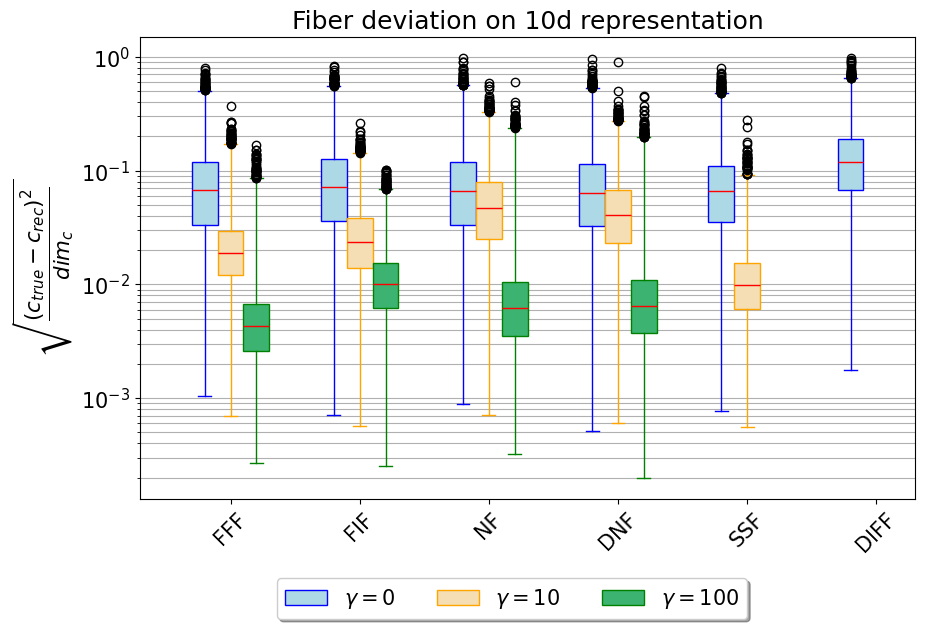

In [10]:
plt.figure(figsize=(10, 6))
_ = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/01","dnf/011","dnf/012","diff/b4","nf/short","nf/short_01","nf/short_02","ssf/01_short","ssf/011_short"]
names = ["FFF", "FIF", "NF", "DNF", "SSF", "DIFF"]
x = [0,1,2,3,4,5]
x1 = [0,1,2,3,4]
x2 = [0,1,2,3]
inds_0 = [0,3,10,6,13,9]
inds_1 = [1,4,11,7,14]
inds_2 = [2,5,12,8]
pos_0 = np.array(x) - 0.2
pos_1 = np.array(x1)
pos_2 = np.array(x2) + 0.2
bpvs0 = [bpvs[i] for i in inds_0]
bpvs1 = [bpvs[i] for i in inds_1]
bpvs2 = [bpvs[i] for i in inds_2]
plt.boxplot(bpvs0, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_0,widths=0.2,label=r"$\gamma=0$",
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs1, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_1,widths=0.2,label=r"$\gamma=10$",
            boxprops=dict(facecolor='wheat', color='orange'),
            whiskerprops=dict(color='orange'),
            capprops=dict(color='orange'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs2, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_2,widths=0.2,label=r"$\gamma=100$",
            boxprops=dict(facecolor='mediumseagreen', color='green'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            medianprops=dict(color='red'))
plt.title('Box Plot')
plt.ylabel('Values')
plt.xticks(x, names[:],rotation=45)
plt.grid(axis='y', which="both", ls="-")
plt.ylabel(r"$\sqrt{\frac{(c_{true}-c_{rec})^2}{dim_c}}$", fontsize=22)
plt.title("Fiber deviation on 10d representation")
plt.yscale('log')
#plt.ylim(0.01, 0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
path = f"plots/emnist/Class/fiber_dist.png"
plt.savefig(path, bbox_inches='tight')
plt.show()

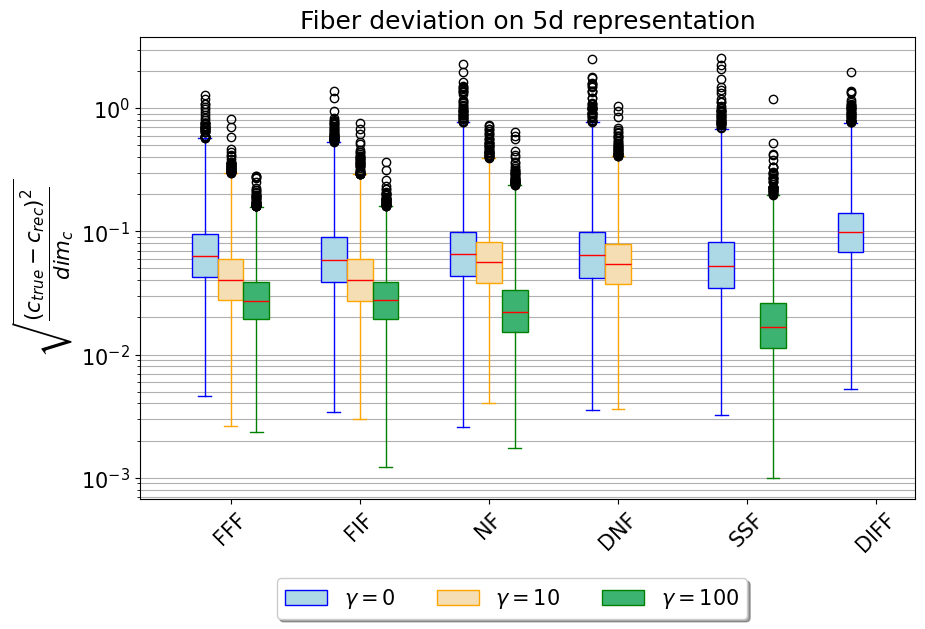

In [16]:
plt.figure(figsize=(10, 6))
_ = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/lin_short","dnf/lin_short_01","diff/b4","nf/lin_short","nf/lin_short_01","nf/lin_short_02","ssf/lin","ssf/lin_02"]
names = ["FFF", "FIF", "NF", "DNF", "SSF", "DIFF"]
x = [0,1,2,3,4,5]
x1 = [0,1,2,3]
x2 = [0,1,2,4]
inds_0 = [0,3,9,6,12,8]
inds_1 = [1,4,10,7]
inds_2 = [2,5,11,13]
pos_0 = np.array(x) - 0.2
pos_1 = np.array(x1)
pos_2 = np.array(x2) + 0.2
bpvs0 = [bpvs[i] for i in inds_0]
bpvs1 = [bpvs[i] for i in inds_1]
bpvs2 = [bpvs[i] for i in inds_2]
plt.boxplot(bpvs0, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_0,widths=0.2,label=r"$\gamma=0$",
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs1, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_1,widths=0.2,label=r"$\gamma=10$",
            boxprops=dict(facecolor='wheat', color='orange'),
            whiskerprops=dict(color='orange'),
            capprops=dict(color='orange'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs2, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_2,widths=0.2,label=r"$\gamma=100$",
            boxprops=dict(facecolor='mediumseagreen', color='green'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            medianprops=dict(color='red'))
plt.title('Box Plot')
plt.ylabel('Values')
plt.xticks(x, names[:],rotation=45)
plt.grid(axis='y', which="both", ls="-")
plt.ylabel(r"$\sqrt{\frac{(c_{true}-c_{rec})^2}{dim_c}}$", fontsize=22)
plt.title("Fiber deviation on 5d representation")
plt.yscale('log')
#plt.ylim(0.01, 0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
path = f"plots/emnist/F5F/fiber_dist.png"
plt.savefig(path, bbox_inches='tight')
plt.show()

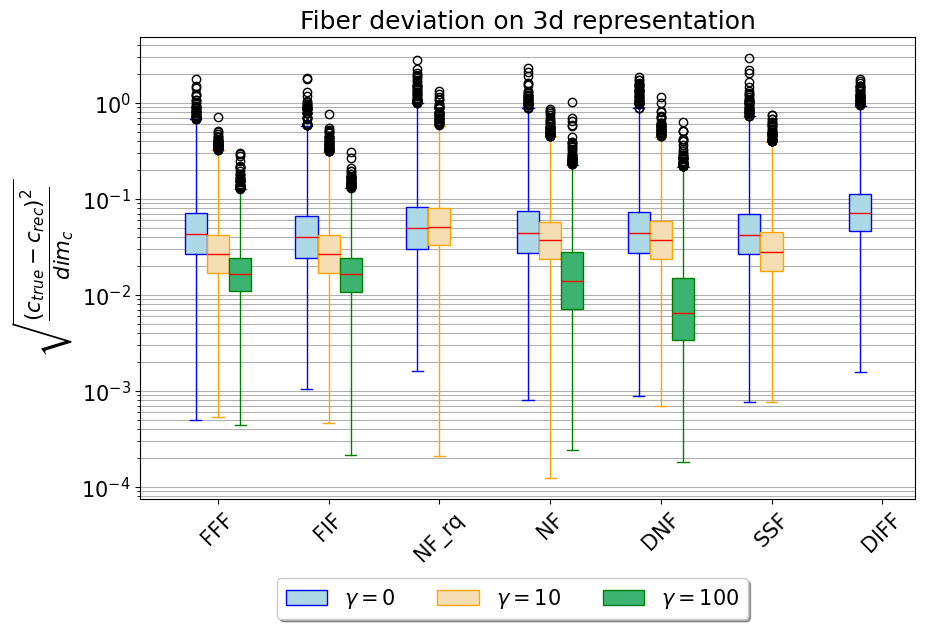

In [24]:
plt.figure(figsize=(10, 6))
_ = ["fff/01","fff/011","fff/012","fif/01","fif/011","fif/012","dnf/lin_short","dnf/lin_short_01","diff/b4","nf/lin_short","nf/lin_short_01","nf/lin_short_02","ssf/lin","ssf/lin_02"]
names = ["FFF", "FIF", "NF_rq", "NF", "DNF", "SSF", "DIFF"]
x = [0,1,2,3,4,5,6]
x1 = [0,1,2,3,4,5]
x2 = [0,1,3,4]
inds_0 = [0,3,15,10,6,13,9]
inds_1 = [1,4,16,11,7,14]
inds_2 = [2,5,12,8]
pos_0 = np.array(x) - 0.2
pos_1 = np.array(x1)
pos_2 = np.array(x2) + 0.2
bpvs0 = [bpvs[i] for i in inds_0]
bpvs1 = [bpvs[i] for i in inds_1]
bpvs2 = [bpvs[i] for i in inds_2]
plt.boxplot(bpvs0, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_0,widths=0.2,label=r"$\gamma=0$",
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs1, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_1,widths=0.2,label=r"$\gamma=10$",
            boxprops=dict(facecolor='wheat', color='orange'),
            whiskerprops=dict(color='orange'),
            capprops=dict(color='orange'),
            medianprops=dict(color='red'))
plt.boxplot(bpvs2, vert=True, patch_artist=True, whis=(0, 99.9), positions=pos_2,widths=0.2,label=r"$\gamma=100$",
            boxprops=dict(facecolor='mediumseagreen', color='green'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            medianprops=dict(color='red'))
plt.title('Box Plot')
plt.ylabel('Values')
plt.xticks(x, names[:],rotation=45)
plt.grid(axis='y', which="both", ls="-")
plt.ylabel(r"$\sqrt{\frac{(c_{true}-c_{rec})^2}{dim_c}}$", fontsize=22)
plt.title("Fiber deviation on 3d representation")
plt.yscale('log')
#plt.ylim(0.01, 0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
path = f"plots/emnist/F3F/fiber_dist.png"
plt.savefig(path, bbox_inches='tight')
plt.show()